## Exploratory Data Analysis into Student Performances
by [Joe Foster](https://www.kaggle.com/joefoster99)

Dataset : [Students Performance in Exams](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams)

**Table of Contents**
1. [Basic Analysis](#1)

    * [Cleaning](#2)
    
    * [Exploring the data](#3)
    
2. [Data Visualisation](#4)

    * [Count Plots](#5)
    
    * [Histograms](#6)
    
    * [Box Plots](#7)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # data visualisation
import seaborn as sns # data visualisation
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv('/kaggle/input/students-performance-in-exams/StudentsPerformance.csv')
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [4]:
df.info

<bound method DataFrame.info of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none    

In [5]:
df.shape

(1000, 8)

In [6]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

<a id ="1"></a>
### Basic Analysis:

<a id ="2"></a>
#### Cleaning:

Checking for duplicates and null values

In [7]:
df.duplicated().sum()

0

In [8]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

We have no duplicates or null values so we can move on

<a id ="3"></a>
#### Exploring the data:

Lets see which groups are more represented

In [9]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

Females make up a slightly larger group than the males do in this data set

In [10]:
df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

Group C has the largest number by a good bit and group A is the smallest by a good bit

In [11]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

Only some of the parents in the dataset have more than a high school degree. Of those that do, most have only an associate's degree.

<a id ="4"></a>
### Data Visualisation:

<a id ="5"></a>
#### Count Plots:

We'll first visulize the findings we found in the exploring phase

<AxesSubplot: xlabel='parental level of education', ylabel='count'>

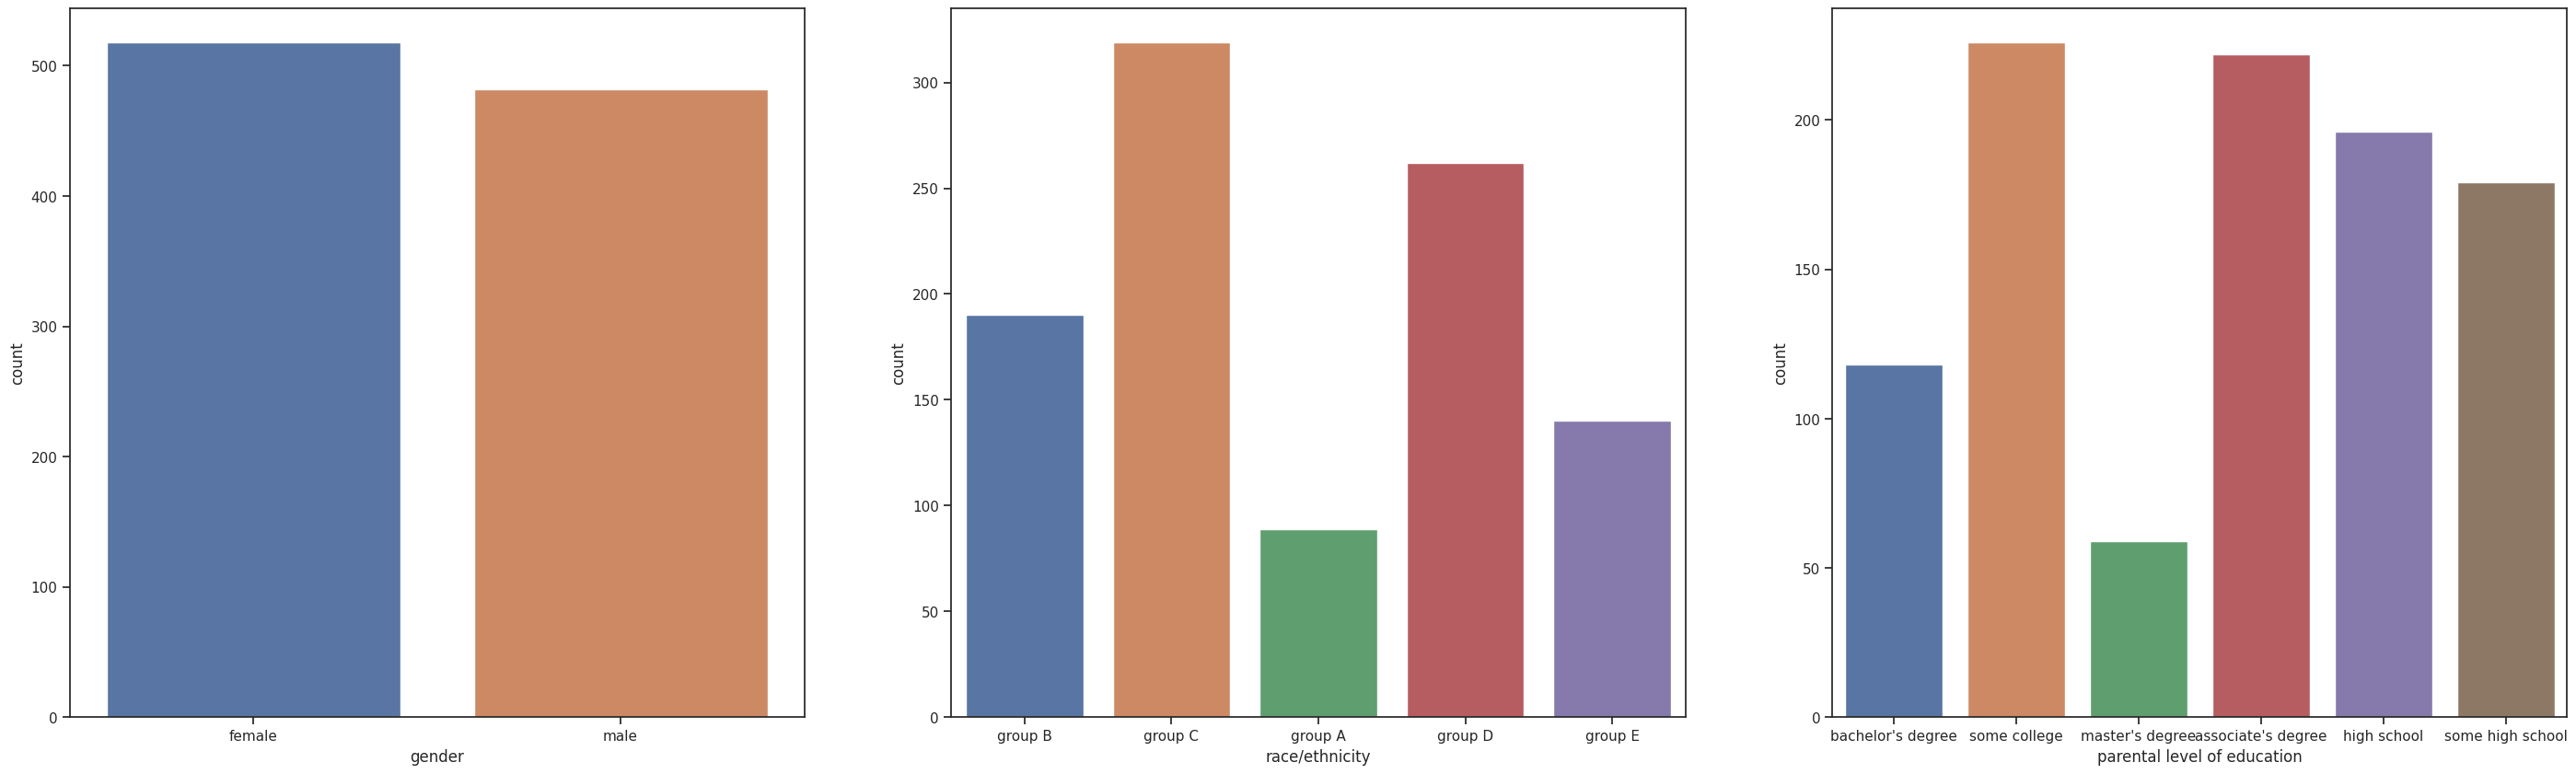

In [12]:
sns.set(style="ticks")
f, axs = plt.subplots(1,3, figsize = (35,10)) # making 3 differnt charts

sns.countplot(data = df, x = 'gender', ax = axs[0]) 
sns.countplot(data = df, x = 'race/ethnicity', ax = axs[1]) 
sns.countplot(data = df, x = 'parental level of education', ax = axs[2]) 

Lets take a look into what the gender counts are in each race group

<AxesSubplot: xlabel='race/ethnicity', ylabel='count'>

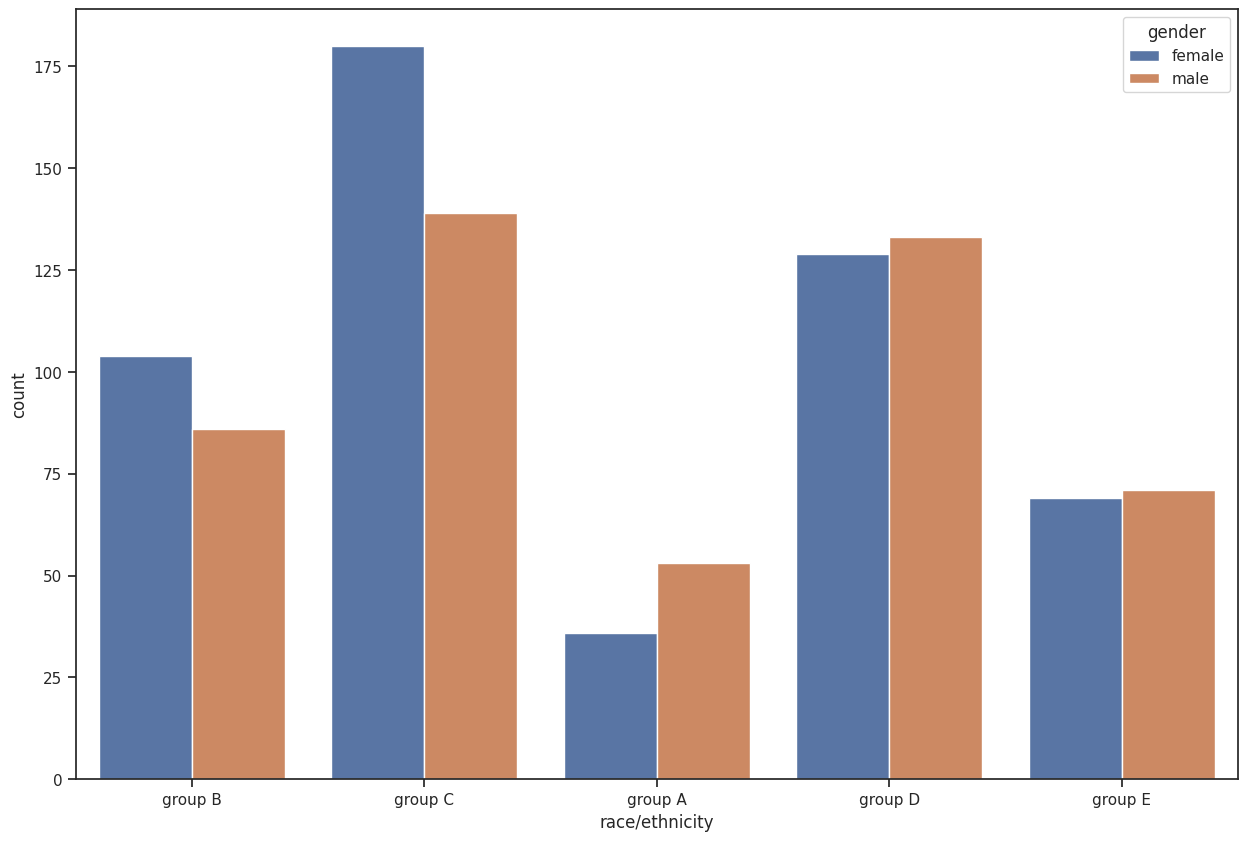

In [13]:
f, axs = plt.subplots(1,1, figsize = (15,10))

sns.countplot(data =df, x = 'race/ethnicity', hue = 'gender')

We see that female only out number males in 2 groups, Groups B and C 

<a id ="6"></a>
#### Hitograms:

Lets see how the kids did on each indivdual scores

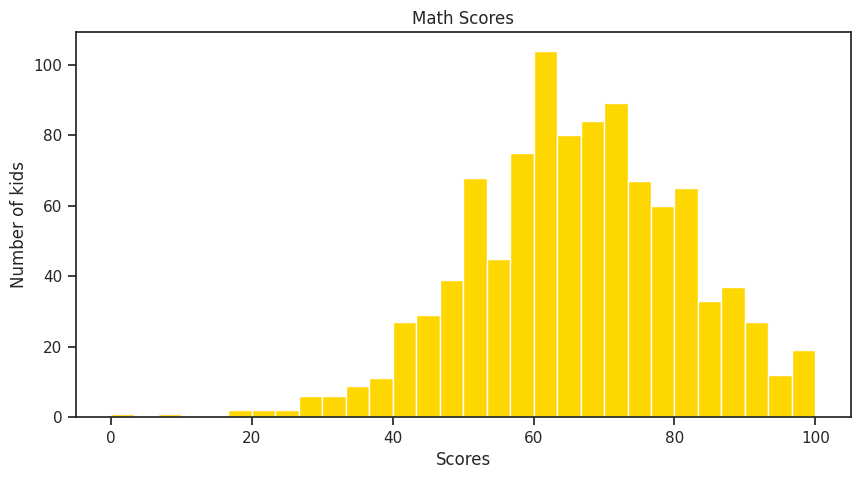

In [14]:
f, ax = plt.subplots(1,1, figsize = (10,5))

plt.hist(df['math score'], 30, color = 'gold')
ax.set(title = 'Math Scores' ,xlabel = 'Scores', ylabel = 'Number of kids')
plt.show()

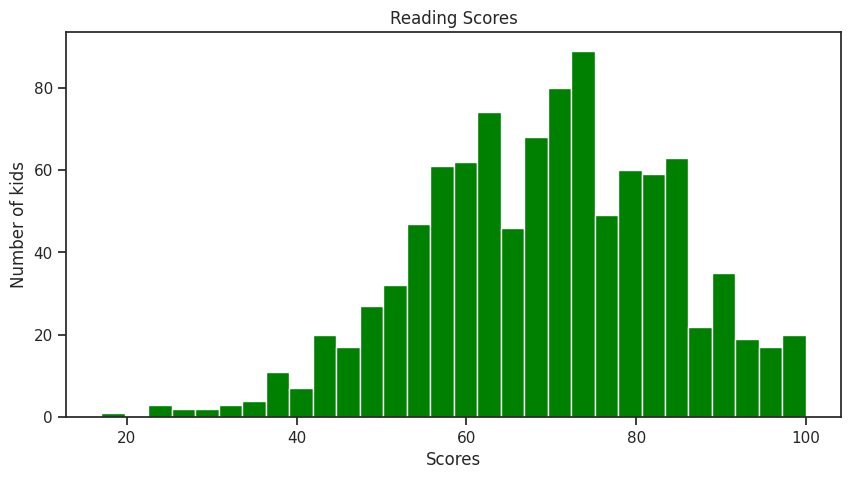

In [15]:
f, ax = plt.subplots(1,1, figsize = (10,5))

plt.hist(df['reading score'], 30, color = 'green')
ax.set(title = 'Reading Scores' ,xlabel = 'Scores', ylabel = 'Number of kids')
plt.show()

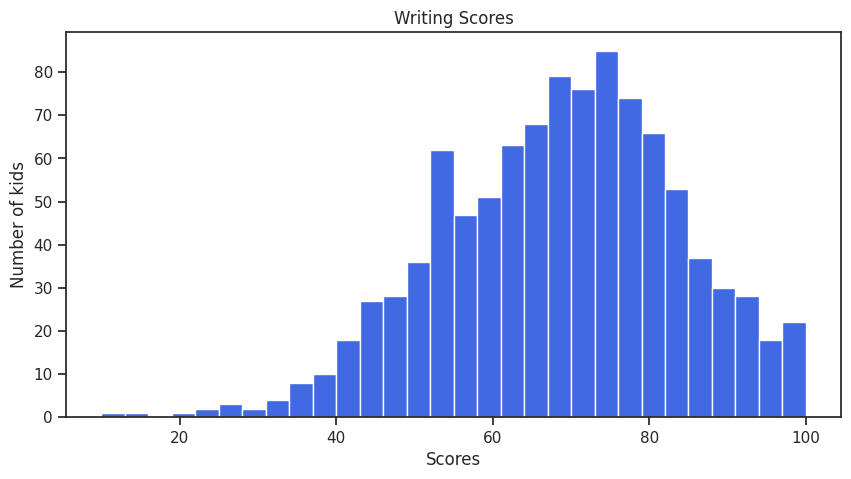

In [16]:
f, ax = plt.subplots(1,1, figsize = (10,5))

plt.hist(df['writing score'], 30, color = 'royalblue')
ax.set(title = 'Writing Scores' ,xlabel = 'Scores', ylabel = 'Number of kids')
plt.show()

These graphs show a few things
1. That the average performance was between 60 and 80.
2. The Writing sections had the highest amount of kids scoring in between 40 and 60 but also the most consistant distrubution of the scores.
3. The Math section had the lowest scores recorded 
4. The Reading scetion had the most varied scores with most kids scoring near 60, 70, and, 80


<a id ="7"></a>
#### Boxplots:

Lets see how the scores differed between race and gender

In [17]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']

First lets look at how each gender did in each section and total score

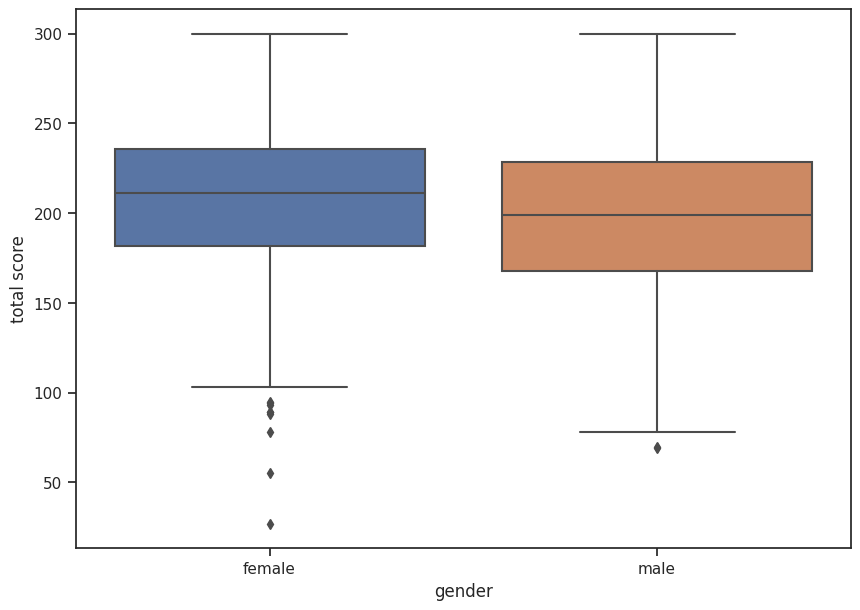

In [18]:
f, ax = plt.subplots(1,1, figsize = (10,7))

ax = sns.boxplot(data = df, x = 'gender', y = 'total score')

<AxesSubplot: xlabel='gender', ylabel='writing score'>

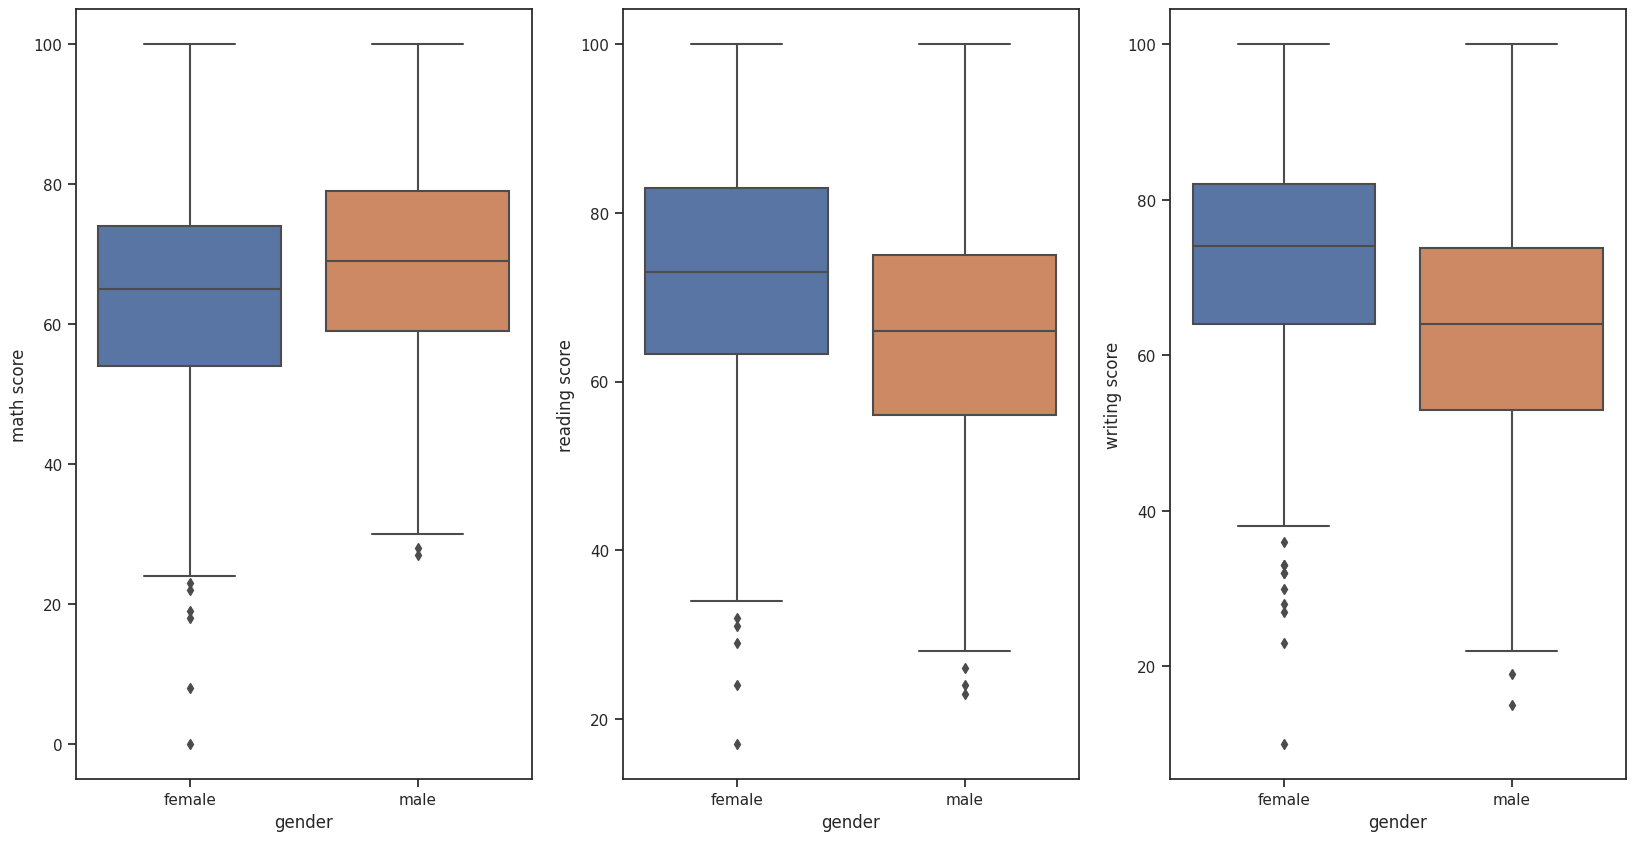

In [19]:
f, axs = plt.subplots(1,3, figsize = (20,10))

sns.boxplot(data = df, x = 'gender', y = 'math score', ax = axs[0])
sns.boxplot(data = df, x = 'gender', y = 'reading score', ax = axs[1])
sns.boxplot(data = df, x = 'gender', y = 'writing score', ax = axs[2])

Now lets look at how each ethnic group did in each section and total score

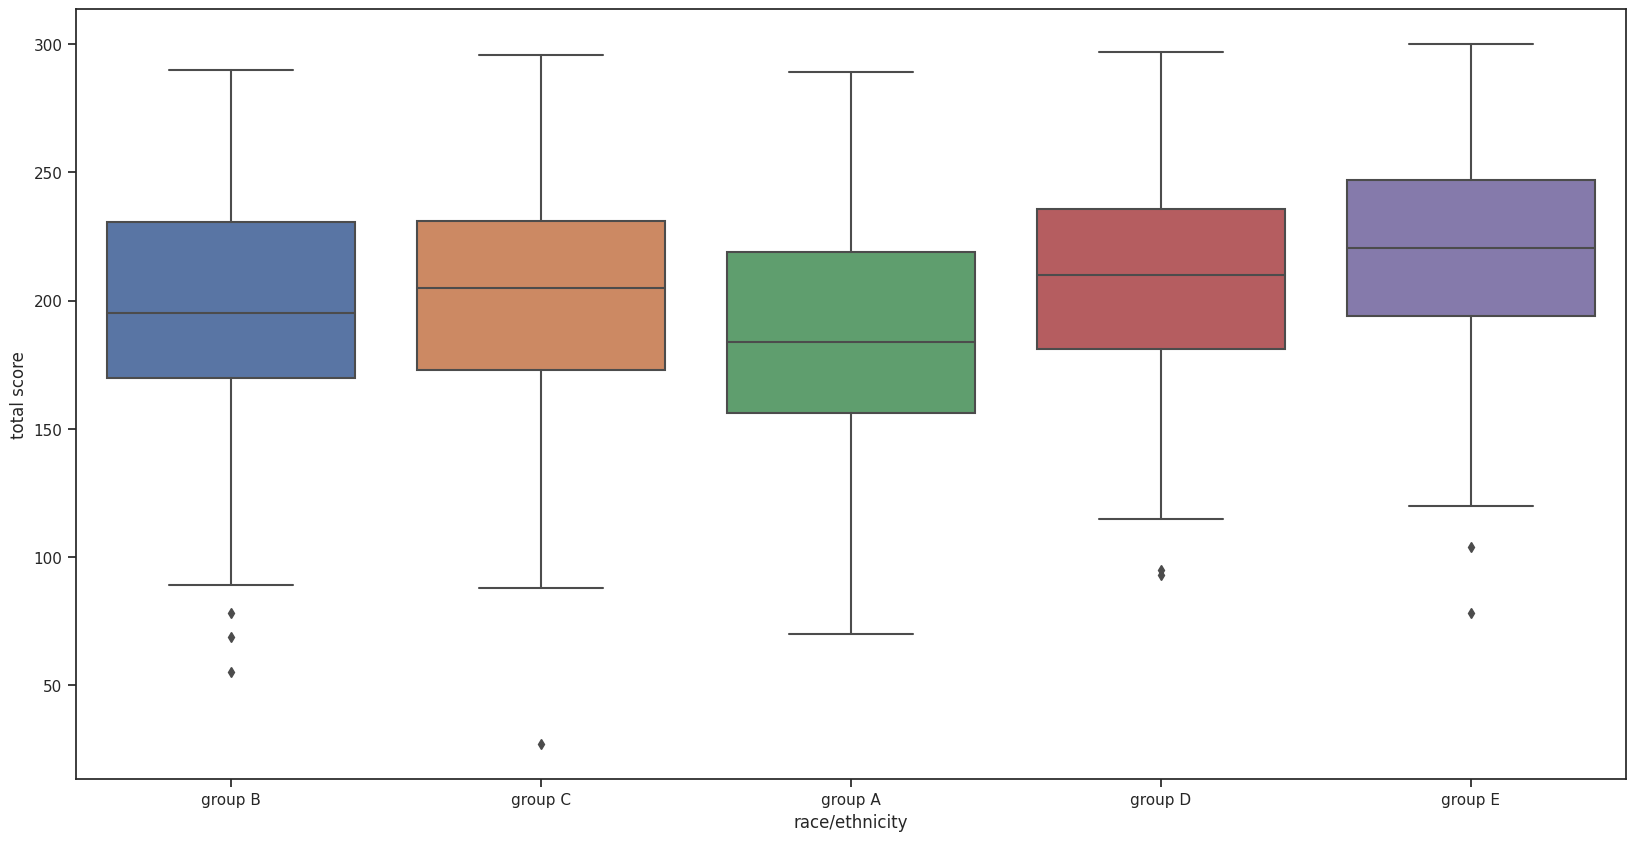

In [20]:
f, ax = plt.subplots(1,1, figsize = (20,10))

ax = sns.boxplot(data = df, x = 'race/ethnicity', y = 'total score')

<AxesSubplot: xlabel='race/ethnicity', ylabel='writing score'>

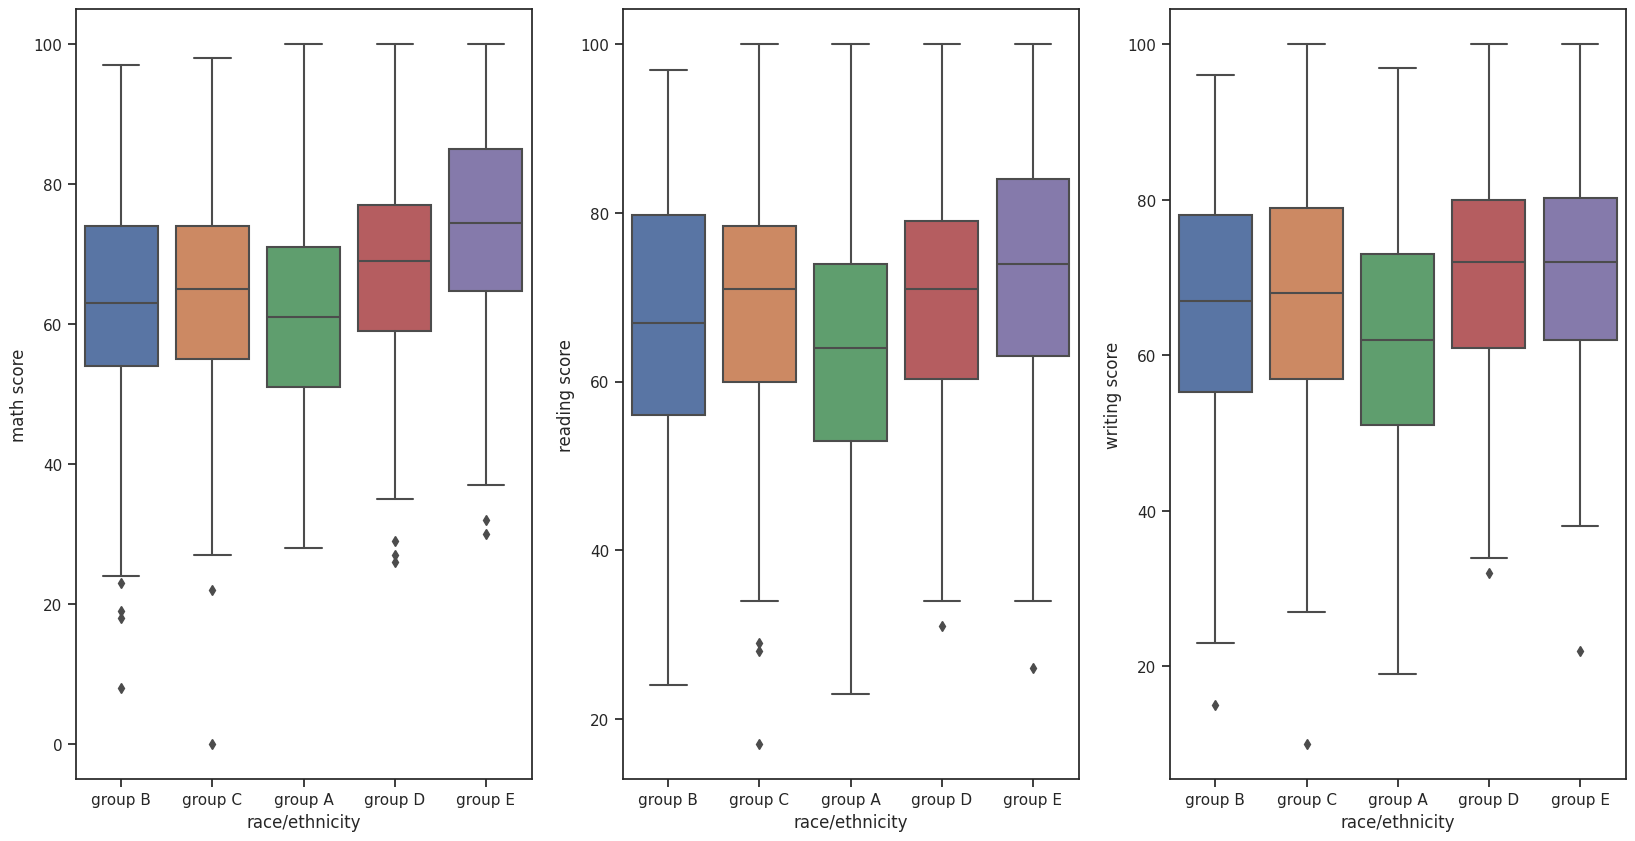

In [21]:
f, axs = plt.subplots(1,3, figsize = (20,10))

sns.boxplot(data = df, x = 'race/ethnicity', y = 'math score', ax = axs[0])
sns.boxplot(data = df, x = 'race/ethnicity', y = 'reading score', ax = axs[1])
sns.boxplot(data = df, x = 'race/ethnicity', y = 'writing score', ax = axs[2])